Importing Dependencies


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBRegressor



Importing Data Collection

In [2]:
#loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv("data/medicalmalpractice.csv").head(10000) 

#first 5 rows of dataframe
dataset.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


In [3]:
#determining the number of rows and columns in dataset
dataset.shape

(10000, 8)

In [4]:
#getting informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            10000 non-null  int64 
 1   Severity          10000 non-null  int64 
 2   Age               10000 non-null  int64 
 3   Private Attorney  10000 non-null  int64 
 4   Marital Status    10000 non-null  int64 
 5   Specialty         10000 non-null  object
 6   Insurance         10000 non-null  object
 7   Gender            10000 non-null  object
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


Categorical Features: 

-Specialty         
-Insurance         
-Gender            

In [5]:
#checking for missing values 
dataset.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

Data Analysis


In [6]:
#statistical measures of the dataset
dataset.describe()

,Amount,Severity,Age,Private Attorney,Marital Status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,155969.764800,4.804800,42.770100,0.653900,1.898700
std,191872.729373,2.067879,19.753143,0.475749,1.007144
min,1576.000000,1.000000,0.000000,0.000000,0.000000
25%,43840.000000,3.000000,28.000000,0.000000,1.000000
50%,97558.500000,4.000000,43.000000,1.000000,2.000000
75%,153939.500000,7.000000,58.000000,1.000000,2.000000
max,925509.000000,9.000000,87.000000,1.000000,4.000000


In [7]:
#Specialty  Column Analysis
print(dataset["Specialty"].value_counts(normalize=True)*100)
#number of differente specialtites
dataset["Specialty"].value_counts().count()


Specialty
Family Practice           13.98
General Surgery           12.04
Anesthesiology            11.48
OBGYN                     11.38
Orthopedic Surgery         8.63
Internal Medicine          6.74
Emergency Medicine         6.24
Neurology/Neurosurgery     5.81
Ophthamology               4.17
Cardiology                 3.29
Urological Surgery         2.62
Resident                   2.61
Radiology                  2.37
Dermatology                1.81
Pediatrics                 1.68
Plastic Surgeon            1.65
Occupational Medicine      0.97
Physical Medicine          0.88
Pathology                  0.83
Thoracic Surgery           0.82
Name: proportion, dtype: float64


np.int64(20)

In [8]:

#Insurances Column Analysis
print(dataset["Insurance"].value_counts(),"\n")

#number of distinct categories
print(dataset["Insurance"].value_counts().count())
df_filtered = dataset

Insurance
Private                 4266
Unknown                 3062
Medicare/Medicaid       1405
No Insurance            1003
Workers Compensation     264
Name: count, dtype: int64 

5


<Axes: ylabel='Amount'>

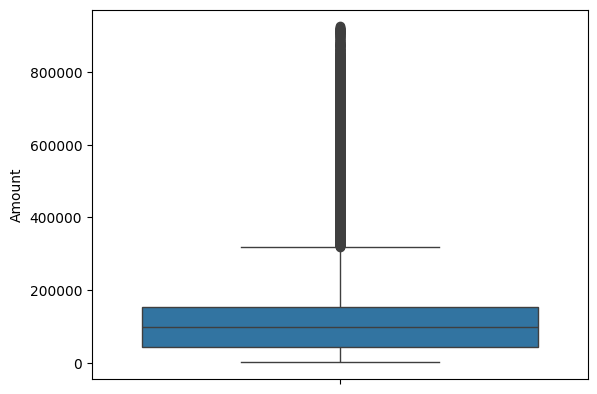

In [9]:

#df_filtered = df_filtered[(df_filtered['Amount'] >= 1576) & (df_filtered['Amount'] <=20000)]


sns.boxplot(df_filtered["Amount"])


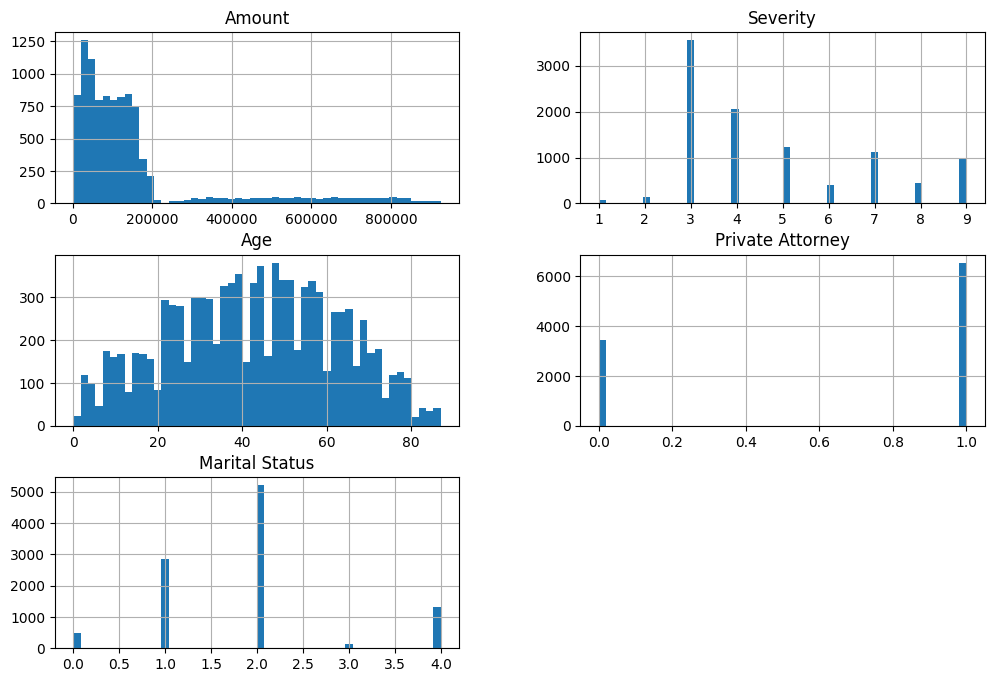

Count of 'Amount' values in range 20500 to 92600: 4761


In [10]:
df_filtered.hist(bins =50 ,figsize=(12,8))
plt.show()
# Find the count of 'Amount' values within the range 20500 to 92600
count_in_range = df_filtered[(df_filtered["Amount"] >= 1600) & (df_filtered["Amount"] <= 92600)].shape[0]

print(f"Count of 'Amount' values in range 20500 to 92600: {count_in_range}")


Data Pre-Processing

In [11]:

df_filtered.head()

#getting correlation matrix
print(df_filtered.dtypes)



Amount               int64
Severity             int64
Age                  int64
Private Attorney     int64
Marital Status       int64
Specialty           object
Insurance           object
Gender              object
dtype: object


Incoding Categorical Features

In [12]:

# Find the most frequent category
most_frequent = df_filtered['Insurance'].mode()[0]

#Replace "Unknown" with the most frequent category
df_filtered['Insurance'] = df_filtered['Insurance'].replace('Unknown', most_frequent)

#encoding Gender Column ,  1 for male and 0 for female
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print(dataset.head())

df_filtered['Gender'] = label_encoder.fit_transform(df_filtered['Gender'])

df_filtered.head()

#label_encoder = LabelEncoder()
#dataset['Specialty'] = label_encoder.fit_transform(dataset['Specialty'])
#dataset['Insurance'] = label_encoder.fit_transform(dataset['Insurance'])
#df_filtered['Gender'] = label_encoder.fit_transform(df_filtered['Gender'])



   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender  
0            Private    Male  
1       No Insurance  Female  
2            Private    Male  
3       No Insurance  Female  
4  Medicare/Medicaid  Female  


,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,1
1,324976,6,38,1,2,OBGYN,No Insurance,0
2,135383,4,34,1,2,Cardiology,Private,1
3,829742,7,42,1,1,Pediatrics,No Insurance,0
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,0


In [13]:
# dataset.drop(columns="Specialty",inplace=True)
# dataset.head()

In [14]:

#summary = dataset.groupby('Specialty')['Amount'].mean().sort_values(ascending=False)
#summary

In [15]:
# # Target Encoding
# # Calculate the mean target value (Amount) for each category in Specialty
# specialty_means = df_filtered.groupby('Specialty')['Amount'].mean()

# # Map these means to the Specialty column
# df_encoded = df_filtered.copy()
# df_encoded['Specialty'] = df_encoded['Specialty'].map(specialty_means)

# # Handle missing values (if any category in test set doesn't exist in train set)
# df_encoded['Specialty'].fillna(df_filtered['Amount'].mean(), inplace=True)

# # Checking samples

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'dataset' is your original dataframe

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid the dummy variable trap

# Reshape the 'Specialty' column to a 2D array (necessary for sklearn)
specialty_encoded = encoder.fit_transform(df_filtered[['Specialty']])

# Convert the encoded array into a DataFrame with column names as the unique values in 'Specialty'
encoded_df = pd.DataFrame(specialty_encoded, columns=encoder.get_feature_names_out(['Specialty']))

# Concatenate the encoded columns with the original dataset (excluding the original 'Specialty' column)
df_encoded = pd.concat([df_filtered.drop('Specialty', axis=1), encoded_df], axis=1)

# Checking the first few rows of the updated dataset
df_encoded.head()
df_encoded.dropna(subset=['Amount'], inplace=True)
df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)
df_encoded.head()



C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_31916\3963086642.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)


,Amount,Severity,Age,Private Attorney,Marital Status,Insurance,Gender,Specialty_Cardiology,Specialty_Dermatology,Specialty_Emergency Medicine,...,Specialty_Ophthamology,Specialty_Orthopedic Surgery,Specialty_Pathology,Specialty_Pediatrics,Specialty_Physical Medicine,Specialty_Plastic Surgeon,Specialty_Radiology,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery
0,57041,7,62,1,2,Private,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,324976,6,38,1,2,No Insurance,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,135383,4,34,1,2,Private,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,829742,7,42,1,1,No Insurance,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,197675,3,60,0,2,Medicare/Medicaid,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Encoding Insurance column
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Insurance column
encoded_data = encoder.fit_transform(df_encoded[['Insurance']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Insurance']))

# Concatenate the encoded DataFrame with the existing df_encoded (which already contains Specialty encoding)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Drop the original Insurance column
df_encoded.drop('Insurance', axis=1, inplace=True)

# Checking the first few rows
print(df_encoded.shape)
df_encoded.info()
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Age',"Marital Status","Severity",]
scaler = MinMaxScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])
df_encoded.head()

(10000, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Amount                            10000 non-null  int64  
 1   Severity                          10000 non-null  int64  
 2   Age                               10000 non-null  int64  
 3   Private Attorney                  10000 non-null  int64  
 4   Marital Status                    10000 non-null  int64  
 5   Gender                            10000 non-null  int64  
 6   Specialty_Cardiology              10000 non-null  float64
 7   Specialty_Dermatology             10000 non-null  float64
 8   Specialty_Emergency Medicine      10000 non-null  float64
 9   Specialty_Family Practice         10000 non-null  float64
 10  Specialty_General Surgery         10000 non-null  float64
 11  Specialty_Internal Medicine       10000 non-null  float6

,Amount,Severity,Age,Private Attorney,Marital Status,Gender,Specialty_Cardiology,Specialty_Dermatology,Specialty_Emergency Medicine,Specialty_Family Practice,...,Specialty_Physical Medicine,Specialty_Plastic Surgeon,Specialty_Radiology,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery,Insurance_Medicare/Medicaid,Insurance_No Insurance,Insurance_Private,Insurance_Workers Compensation
0,57041,0.750,0.712644,1,0.50,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,324976,0.625,0.436782,1,0.50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,135383,0.375,0.390805,1,0.50,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,829742,0.750,0.482759,1,0.25,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,197675,0.250,0.689655,0,0.50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Splitting Features and Target


In [17]:
df_encoded.dropna(subset=['Amount'], inplace=True)
df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_31916\1910219017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)


Splitting the data into Training Data & Testing Data

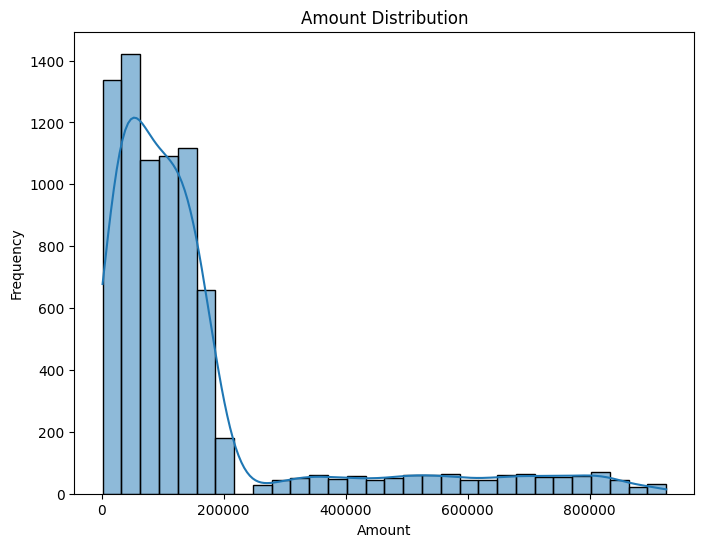

In [18]:
X = df_encoded.drop('Amount', axis=1)
y = df_encoded['Amount']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(8, 6))
sns.histplot(Y_train, kde=True, bins=30)  
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [19]:
print(X.shape,X_train.shape,X_test.shape)






(10000, 28) (8000, 28) (2000, 28)


Model Training

In [20]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=6)  # You can change the degree as needed
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)


In [21]:
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# X_poly_train_scaled = scaler.fit_transform(X_poly_train)
# X_poly_test_scaled = scaler.transform(X_poly_test)


In [22]:
# poly_regressor = RandomForestRegressor()
# poly_regressor.fit(X_train, Y_train)
print(Y_train.isnull().sum())  # Check for NaN values
X_train.head()
X_train.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Severity                          8000 non-null   float64
 1   Age                               8000 non-null   float64
 2   Private Attorney                  8000 non-null   int64  
 3   Marital Status                    8000 non-null   float64
 4   Gender                            8000 non-null   int64  
 5   Specialty_Cardiology              8000 non-null   float64
 6   Specialty_Dermatology             8000 non-null   float64
 7   Specialty_Emergency Medicine      8000 non-null   float64
 8   Specialty_Family Practice         8000 non-null   float64
 9   Specialty_General Surgery         8000 non-null   float64
 10  Specialty_Internal Medicine       8000 non-null   float64
 11  Specialty_Neurology/Neurosurgery  8000 non-null   float64
 12  Specia

In [53]:
#loading the regression model
from lightgbm import LGBMRegressor

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  # Transform the training features
X_test_poly = poly.transform(X_test)       # Transform the test features

# Step 2: Train Linear Regression Model
linear_model =XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, random_state=42)
linear_model.fit(X_train_poly, Y_train)




#regressor = LinearRegression()
# from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
# poly_regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
#              colsample_bylevel=None, colsample_bynode=None,
#              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
#              enable_categorical=False, eval_metric=None, feature_types=None,
#              gamma=None, grow_policy=None, importance_type=None,
#              interaction_constraints=None, learning_rate=0.01, max_bin=None,
#              max_cat_threshold=None, max_cat_to_onehot=None,
#              max_delta_step=None, max_depth=9, max_leaves=None,
#              min_child_weight=None, monotone_constraints=None,
#              multi_strategy=None, n_estimators=350, n_jobs=None,
#              num_parallel_tree=None, random_state=42)
# poly_regressor.fit(X_train, Y_train)


# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 500],       # Number of trees
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],       # Shrinkage step size
#     'max_depth': [2, 4, 6, 8, 10, 12],             # Tree depth
#     'subsample': [0.6, 0.8, 1.0],                  # Fraction of samples for training
#     'colsample_bytree': [0.6, 0.8, 1.0],           # Fraction of features per tree
#     'reg_alpha': [0, 0.01, 0.1, 1],                # L1 regularization
#     'reg_lambda': [1, 1.5, 2, 5]                   # L2 regularization
# }

# # Initialize the model
# xgb_model = XGBRegressor(random_state=42)

# # Use RandomizedSearchCV for faster tuning (optional: switch to GridSearchCV for exhaustive search)
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=100,                      # Number of parameter settings to sample
#     scoring='neg_mean_squared_error',
#     cv=3,                            # 3-fold cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1                        # Use all available cores for faster computation
# )

# # Fit RandomizedSearchCV to find the best parameters
# random_search.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Model Evaluation

In [54]:
training_data_prediction = linear_model.predict(X_train_poly)
test_data_prediction = linear_model.predict(X_test_poly)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
r2_train = r2_score(Y_train, training_data_prediction)
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared value (Train): ', r2_train)
print('R squared value (Test): ', r2_test)
#RF is 0.77 , 0.63   : LR UNDERFITS , XGB is 0.8 to 0.58


R squared value (Train):  0.7699593305587769
R squared value (Test):  0.5877853631973267


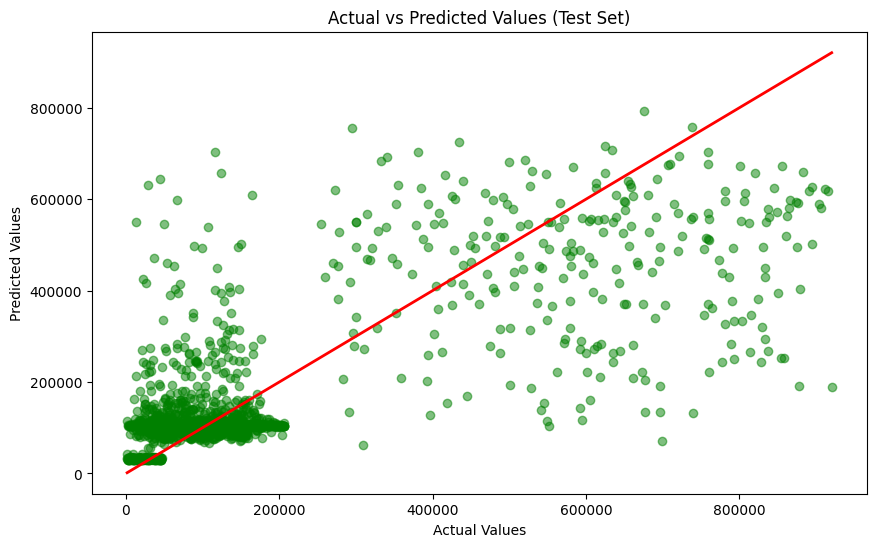

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='green', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


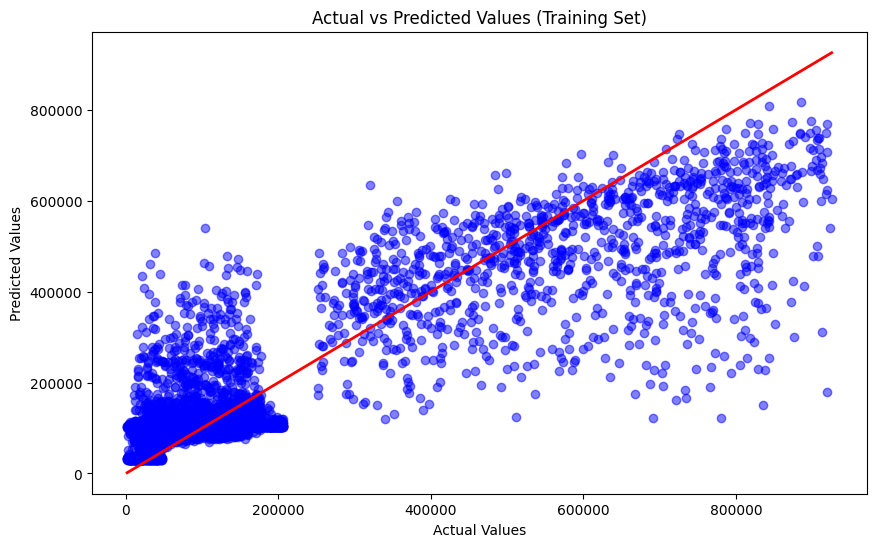

In [57]:
# Assuming Y_train and training_data_prediction are your actual and predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue', alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()


<Axes: ylabel='Amount'>

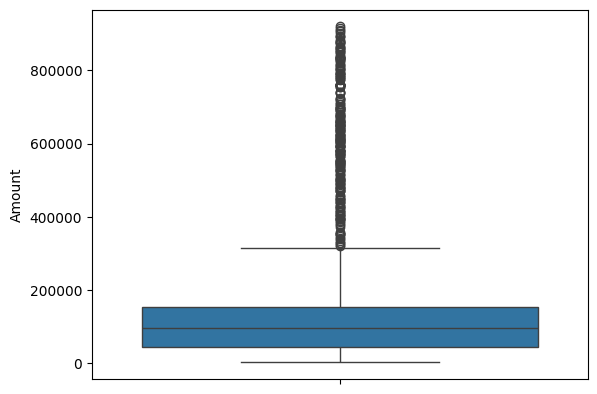

In [58]:
sns.boxplot(Y_test)